# ROCK or MINE PREDICTION 

## Построим модель, которая будет предсказывать что находится на дне водоема.

### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline

### Загрузка и предобоработка данных  

In [2]:
# у датафрейма отстутсвует названия столбцов, поэтому ставим параметр header=None
df=pd.read_csv('Copy of sonar data.csv', header=None)

In [3]:
# Отобразим первые 5 строк
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
# Отобразим размерность данных
print(f'Кол-во строк: {df.shape[0]}\nКол-во столбцов: {df.shape[1]}')

Кол-во строк: 208
Кол-во столбцов: 61


In [5]:
# Посмотрим на типы столбцов в датафрейме, заметим, что все типы кроме последнего столбца являются числовыми
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [6]:
# Проверка на наличие пустых ячеек в датафрейме
df.isnull().sum().sum()

0

In [7]:
# Присутсвует 2 класса, "M"- мина, "R"- камень. Что немаловажно, классы сбалансированы
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

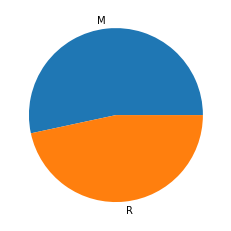

In [8]:
# Отобразим на круговой диаграмме два класса
labels=['M',"R"]
plt.pie(np.array([df[60].value_counts()[0],df[60].value_counts()[1]]), labels=labels)
plt.show()

In [9]:
# Так как у нас всего 2 класса, то это задача бинарной классификации, поэтому заменим метки на 0 и 1.      
df[60]=df[60].replace({"M":0,"R":1})

In [10]:
# Отделим метки класса от остального датафрейма 
X=df.drop(columns=[60])
y=df[60]

In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: 60, dtype: int64

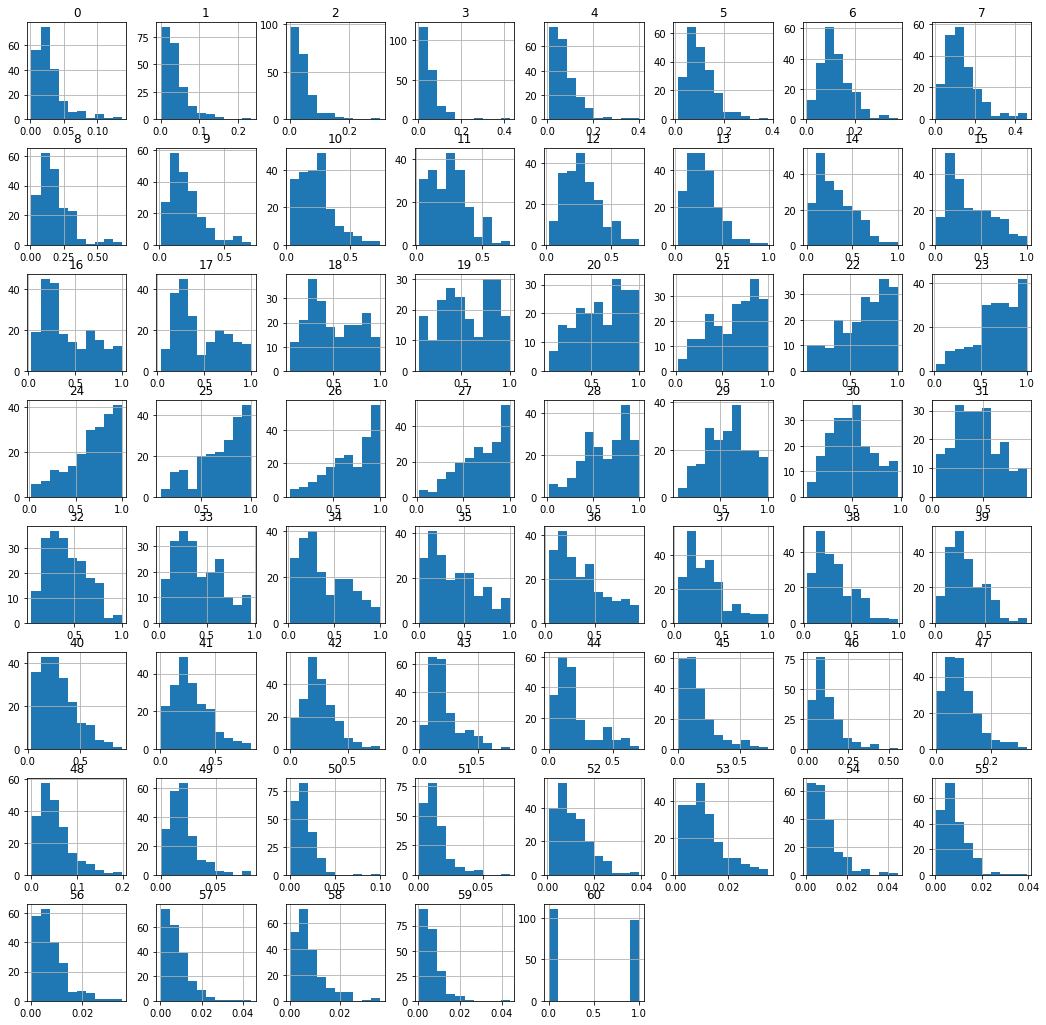

In [12]:
# Отобразим распределение каждого столбца датафрема
# Стоит отметить, что большинство признаков иммеют распределение похожее на экспоненциальное 
df.hist(figsize=(18,18));

In [13]:
# Вычислим корреляционную таблицу и отсортируем значения по убыванию 
pd.set_option('display.max_rows', None)
corr=X.corr().abs()
corr=corr.unstack().sort_values(kind="quicksort",ascending=False)[X.shape[1]:]

In [14]:
# Вычленим занчения больше 0.9 (на самом деле порог можно и уменьшить, здесь решил оставить так)
corr_treshold=0.9
corr_1=corr[corr>corr_treshold]

In [15]:
# отобразим номера колонок и коэффицент корреляции между ними
corr_1

17  16    0.925836
16  17    0.925836
14  15    0.912625
15  14    0.912625
20  19    0.905062
19  20    0.905062
dtype: float64

In [16]:
# Видно, что между 16 и 17, 14 и 15, 19 и 20 сильная связь, 
#поэтому у нас может возникнуть мультиколлинеарность (учитывая, что будет использована логистическая регрессия)
col_to_drop_list=[]
for i in range(len(corr_1)):
    if i%2==0:
        col_to_drop=corr.index[:len(corr_1)][i][0]
        print(f'удаляем колонку №{col_to_drop}')
        col_to_drop_list.append(col_to_drop)
X=X.drop(columns=col_to_drop_list)

удаляем колонку №17
удаляем колонку №14
удаляем колонку №20


### Train  test split 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42)

In [18]:
X_train.shape,y_train.shape

((156, 57), (156,))

### Обучение моделей

In [19]:
# Обучим сразу несколько моделей
# Логистическая регрессия, Наивный Байес, Решающие деревья, Метод опорных векторов
# Все они хорошо подходят для задачи классификации
# В данном jupyter notebook мы не будем использовать ансамбли моделей (оставим их для других задач)
# Помимо accuracy, мы рассчитаем метрики recall и precision
# В нашей задачи предсказания мин на дне водоема, нам необходимо не пропускать мины, поэтому метрика recall предпочтительнее остальных 
models=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),SVC()]
metrics_df=pd.DataFrame(columns=["model","accuracy","precision","recall"])
for model in models:
    clf=model
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    metrics_df = metrics_df.append({'model': model,'accuracy':round(accuracy_score(y_test,y_pred),3),
                   'precision':round(precision_score(y_test,y_pred),3),
                  'recall':round(recall_score(y_test,y_pred),3)},ignore_index=True)
    

In [20]:
metrics_df.sort_values(by=['recall'],ascending=False)

,model,accuracy,precision,recall
1,GaussianNB(),0.769,0.656,0.955
0,LogisticRegression(),0.865,0.800,0.909
3,SVC(),0.827,0.760,0.864
2,DecisionTreeClassifier(),0.673,0.586,0.773


Отметим отличный recall у Наивного Байеса (причиной может служит то, что Наивный Байес хорошо обучается на маленьких данных), и хороший accuracy у лог. регресии

In [21]:
# Стандартизуем данные для наших моделей 
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform (X_test)

In [22]:
# Обучим модели на стандартизованных данных
metrics_df_sc=pd.DataFrame(columns=["model","accuracy","precision","recall"])
for model in models:
    clf=model
    clf.fit(X_train_sc,y_train)
    y_pred=clf.predict(X_test_sc)
    metrics_df_sc = metrics_df_sc.append({'model': model,'accuracy':round(accuracy_score(y_test,y_pred),3),
                   'precision':round(precision_score(y_test,y_pred),3),
                  'recall':round(recall_score(y_test,y_pred),3)},ignore_index=True)
    

In [23]:
metrics_df_sc.sort_values(by=['recall'],ascending=False)

,model,accuracy,precision,recall
1,GaussianNB(),0.769,0.656,0.955
3,SVC(),0.904,0.840,0.955
0,LogisticRegression(),0.808,0.731,0.864
2,DecisionTreeClassifier(),0.692,0.615,0.727


После стандартизации метрики метода опорных векторов улучшились, что немаловажно, recall достиг тех же значений, что и у наивного Байеса.
Стоит  отметить, как посредственно с задачей справляется решающее дерево

### Предсказание

In [24]:
import random

In [25]:
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [36]:
ind=random.randint(0,X.shape[0]-1)

In [37]:
input_row=X.loc[ind].to_numpy()
dict_pred={1:"Mine",0:"Rock"}

In [38]:
pred=clf.predict(input_row.reshape(1, -1))[0]
print(f'Предсказанное значение: {dict_pred[pred]}\nИстинное значение: {dict_pred[y[ind]]}')

Предсказанное значение: Mine
Истинное значение: Mine
